# Detecting scale invariant keypoints

Objects in the real world are moving, making it harder to accurately compare them with their previous appearances. When they approach the camera, the objects get bigger. To deal with this situation, we should be able to detect keypoints that are insensitive to an object's size differences. **Scale Invariant Feature Transform (SIFT)** descriptors have been designed especially to handle different object scales and find the same features for the objects, no matter what their size is. This recipe shows you how to use SIFT implementation from OpenCV.

To create an instance of the SIFT keypoints detector, you need to use the `cv2.xfeatures2d.SIFT_create` function. All its arguments have default values, and the arguments themselves are: the number of keypoints to find and return, the number of levels in the scale pyramid to use, the two thresholds to tune the sensitivity of the algorithm, and the sigma variance for presmoothing the image. All of the arguments are important, but the ones you probably need to tunr in the first place are the number of keypoints and the sigma. The last one controls the maximal size of the objects you don't care about and can be useful to remove the noise and extra small details from the image.

In [1]:
# Import all of the necessary modules
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os

%matplotlib auto
%pylab inline

def print_image(header,name,np_arr,
                start_First=0,end_First=1,start_Second=0,end_Second=2,start_3=0,end_3=5):
    print("------  {0:-<25}    Shape{1} {2}: {3:}".format(header, np_arr.shape, name, str(np_arr.dtype)) )
    shapes = np_arr.shape #print(shapes)
    if shapes[0] < end_First:
        end_First = shapes[0]
    if shapes[1] < end_Second:
        end_Second = shapes[1]
    if len(shapes)==3:
        if shapes[2] < end_3:
            end_3 = shapes[2]
    if len(shapes)==3:
        for i in range (start_First,end_First):
            print("[", sep='',end="")
            for j in range (start_Second,end_Second):
                print(np_arr[i,j,start_3:end_3], sep=' ', end=" ")
            print(']')
    if len(shapes)==2:
        for i in range (start_First,end_First):
            print("[", end=" ")
            #print(np_arr[i,start_Second:end_Second],sep=' ',end=" ") cutoff sting by<60
            for k in range (start_Second,end_Second):
                print(np_arr[i,k], end=" ")
            print(']')

def draw_grid(img, pxystep=None,major_color=None, pxstep=None,pystep=None):
    #print("{0} XY{1} color{2} X{3} Y{4}".format(img.shape, pxystep,major_color,pxstep,pystep))
    pXYstep = None; pXstep=None; pYstep=None; 
    major_Color=None; minor_Color=None; major_Alpha=None; minor_Alpha=None;
    if pxystep != None:
        pXYstep = pXstep  = pYstep  = pxystep;
    else:
        pXstep = pxstep if pxstep != None else 100
        pYstep = pystep if pystep != None else 100
    #print("pXstep", pXstep, "pYstep", pYstep)
    major_Color = major_color if major_color != None else (204, 204, 204) #'#CCCCCC'
    if pXstep != None:
        x = pXstep
        #Draw all lines on X
        while x < img.shape[1]:
            cv2.line(img, (x, 0), (x, img.shape[0]), color=major_Color, thickness=1)
            x += pXstep
    if pYstep != None:
        y = pYstep
        #Draw all lines on Y
        while y < img.shape[0]:
            cv2.line(img, (0, y), (img.shape[1], y), color=major_Color,thickness=1)
            y += pYstep
    return img
            
def plt_view_image(plt,list_images,figsize=(15,6), axis="off", cmap='gray'):
    plt.figure(figsize=figsize)
    n = len(list_images)  #; print(n)
    plot_number = 1
    for name, img in list_images:
        plt.subplot(1,n,plot_number)
        plt.axis(axis); plt.title(name)
        if cmap =='gray': plt.imshow(img,cmap='gray' )
        else: plt.imshow(img)
        plot_number = plot_number + 1
    plt.show()

def plt_view_grid(plt, axis ='off',
                  xy_sizeaxis =None,
                  xy_measuare =None,
                  x_min=-10, x_max=10, y_min=-10, y_max=10,
                  x_major_size=1, x_minor_size=0.2, y_major_size=1, y_minor_size=0.2,
                  major_color='#CCCCCC', major_alpha=0.5,
                  minor_color='#CCCCCC', minor_alpha=0.2
                 ):
    if xy_sizeaxis is None:  x_min=-10; x_max=10; y_min=-10; y_max=10;
    else: x_min, x_max, y_min, y_max = xy_sizeaxis

    if xy_measuare is None:  x_major_size=1; x_minor_size=0.2; y_major_size=1; y_minor_size=0.2;
    else: x_major_size, x_minor_size, y_major_size, y_minor_size = xy_measuare
        
    plt.xlim(x_min, x_max); plt.ylim(y_min, y_max);
    ax = plt.gca()
    x_major_ticks=np.arange(x_min,x_max,x_major_size); x_minor_ticks=np.arange(x_min,x_max,x_minor_size)
    y_major_ticks=np.arange(y_min,y_max,y_major_size); y_minor_ticks=np.arange(y_min,y_max,y_minor_size)
    ax.set_xticks(x_major_ticks)
    ax.xaxis.set_major_locator(MultipleLocator(x_major_size))
    ax.set_xticks(x_minor_ticks, minor=True)
    ax.set_yticks(y_major_ticks)
    ax.yaxis.set_major_locator(MultipleLocator(y_major_size))
    ax.set_yticks(y_minor_ticks, minor=True)
    plt.grid(which='major', color=major_color, alpha=major_alpha)
    plt.grid(which='minor', color=minor_color, alpha=minor_alpha)
    
#help("modules")   
import sys             
print('\n'.join(sys.path))
print("current folder ==",os.getcwd())
#pip list

Using matplotlib backend: TkAgg
Populating the interactive namespace from numpy and matplotlib
D:\HTML_DOC\Program\opencv\Packt\S07\env
C:\Program Files\Python38\python38.zip
C:\Program Files\Python38\DLLs
C:\Program Files\Python38\lib
C:\Program Files\Python38
d:\html_doc\program\opencv\packt\s07\env

d:\html_doc\program\opencv\packt\s07\env\lib\site-packages
d:\html_doc\program\opencv\packt\s07\env\lib\site-packages\pip-20.0.2-py3.8.egg
d:\html_doc\program\opencv\packt\s07\env\lib\site-packages\win32
d:\html_doc\program\opencv\packt\s07\env\lib\site-packages\win32\lib
d:\html_doc\program\opencv\packt\s07\env\lib\site-packages\Pythonwin
d:\html_doc\program\opencv\packt\s07\env\lib\site-packages\IPython\extensions
C:\Users\polit\.ipython
current folder == D:\HTML_DOC\Program\opencv\Packt\S07\env


------  data/scenetext01.jpg-----    Shape(512, 512, 3) img_orig: uint8
[[120  71 130] [ 97  43 121] [ 93  42 118] [106  64 151] [125 100 181] [120  75 160] [117  65 145] ]
[[ 86  35 108] [ 92  39 114] [119  65 140] [115  70 149] [127  84 159] [115  68 145] [107  56 134] ]
[[ 92  40 110] [106  57 129] [137  81 154] [122  80 151] [136  88 151] [121  73 137] [ 86  35 110] ]
[[105  52 124] [140  87 152] [147 101 163] [127  78 148] [137  81 144] [ 95  43 114] [ 83  31 105] ]
[[139  86 153] [154 113 169] [147 104 167] [129  81 147] [101  53 125] [ 93  37 106] [113  63 122] ]
------  data/scenetext01.jpg-----    Shape(512, 512, 3) img_orig: uint8
[[103  45 117] [ 89  36 104] [ 95  42 106] [117  57 119] [117  58 117] [109  50 112] [106  48 113] ]
[[110  54 122] [ 90  39 104] [ 88  41 102] [109  52 113] [119  57 120] [101  45 111] [109  48 113] ]
[[117  65 126] [ 94  45 111] [ 86  42 105] [101  45 106] [110  52 116] [ 95  42 110] [113  49 115] ]
[[110  63 125] [ 98  51 117] [ 93  45 107] [89 4

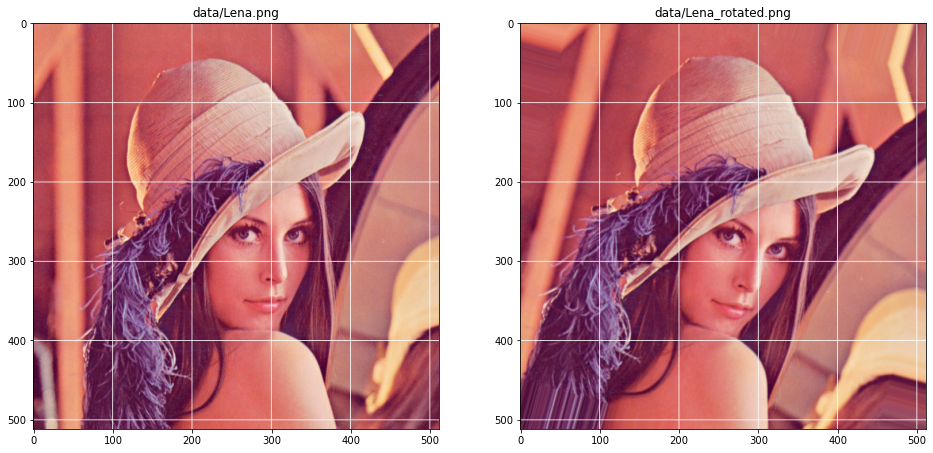

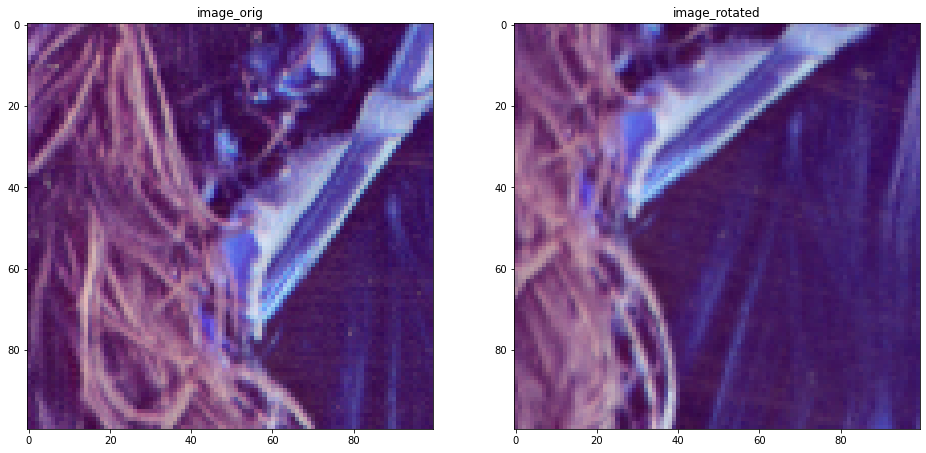

In [2]:
import cv2
import numpy as np

image_orig = cv2.imread('../data/Lena.png', cv2.IMREAD_COLOR)
image_rotated = cv2.imread('../data/Lena_rotated.png', cv2.IMREAD_COLOR)



######################################
print_image('data/scenetext01.jpg','img_orig',image_orig,300,305,100,107)
print_image('data/scenetext01.jpg','img_orig',image_rotated,300,305,100,107)
plt_view_image(plt,[["data/Lena.png", draw_grid(np.copy(image_orig),100,(255,255,255))[:,:,[2,1,0]]],
                    ["data/Lena_rotated.png",
                     draw_grid(np.copy(image_rotated),100,(255,255,255))[:,:,[2,1,0]]]],
               figsize=(16,8), axis='on', cmap='gray')

plt_view_image(plt,[["image_orig", image_orig[300:400,100:200]],
                    ["image_rotated", image_rotated[300:400,100:200]]],
               figsize=(16,8), axis='on', cmap='gray') 

------  data/scenetext01.jpg-----    Shape(512, 512, 3) img_orig: uint8
[[120  71 130] [ 97  43 121] [ 93  42 118] [106  64 151] [125 100 181] [120  75 160] [117  65 145] ]
[[ 86  35 108] [ 92  39 114] [119  65 140] [115  70 149] [127  84 159] [115  68 145] [107  56 134] ]
[[ 92  40 110] [106  57 129] [137  81 154] [122  80 151] [136  88 151] [121  73 137] [ 86  35 110] ]
[[105  52 124] [140  87 152] [147 101 163] [127  78 148] [137  81 144] [ 95  43 114] [ 83  31 105] ]
[[139  86 153] [154 113 169] [147 104 167] [129  81 147] [101  53 125] [ 93  37 106] [113  63 122] ]
------  image_rotated------------    Shape(512, 512, 3) image_rotated: uint8
[[103  45 117] [ 89  36 104] [ 95  42 106] [117  57 119] [117  58 117] [109  50 112] [106  48 113] ]
[[110  54 122] [ 90  39 104] [ 88  41 102] [109  52 113] [119  57 120] [101  45 111] [109  48 113] ]
[[117  65 126] [ 94  45 111] [ 86  42 105] [101  45 106] [110  52 116] [ 95  42 110] [113  49 115] ]
[[110  63 125] [ 98  51 117] [ 93  45 107] 

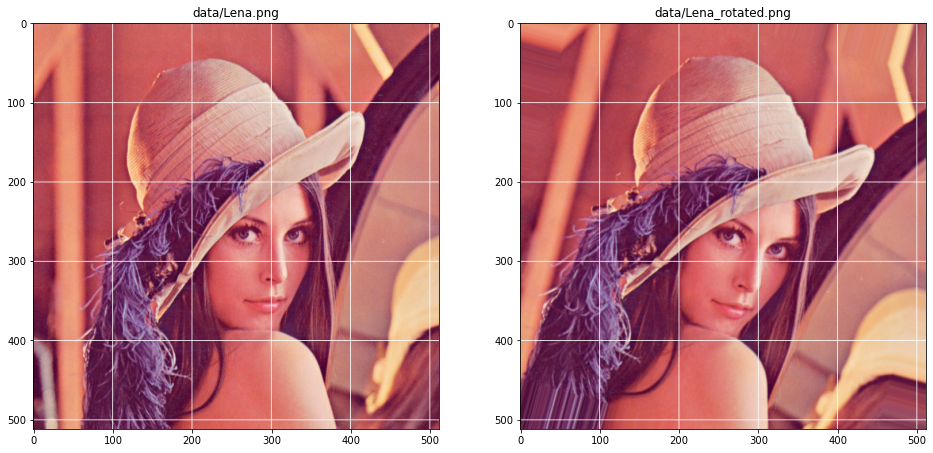

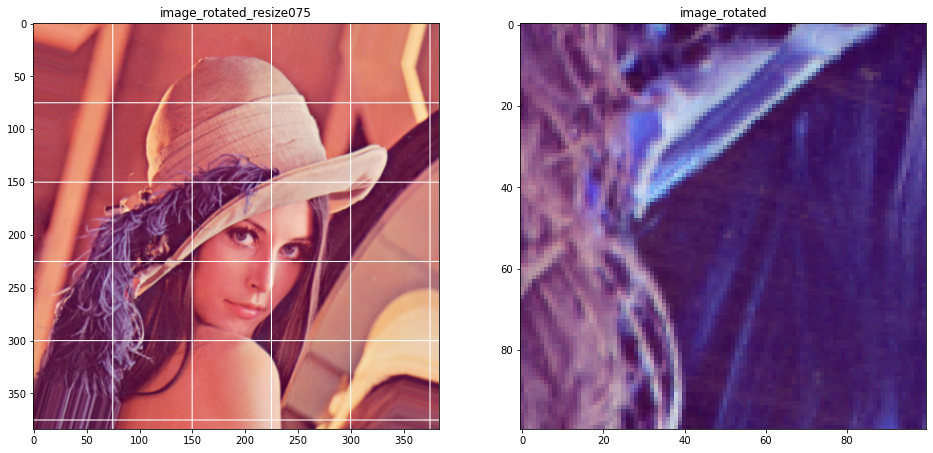

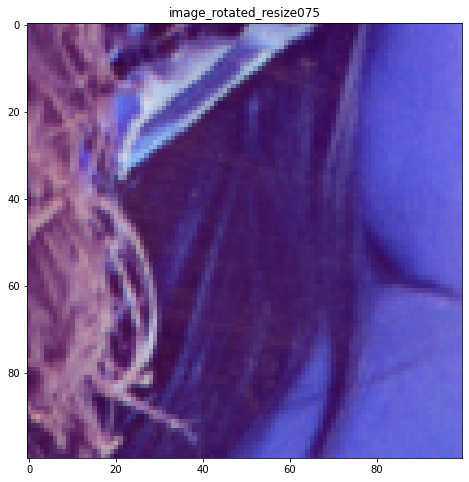

In [3]:
fX=0.75; 
fY=0.75;
image_rotated_resize075 = cv2.resize(image_rotated, None, fx=fX, fy=fY)



######################################
x0,  x1, y0, y1 = 300,305,100,107
dx0,dx1,dy0,dy1 = int(x0*fX), int(x1*fX), int(y0*fY), int(y1*fY)
print_image('data/scenetext01.jpg','img_orig',image_orig, x0,x1,y0,y1)
print_image('image_rotated','image_rotated',image_rotated,x0,x1,y0,y1)
print_image('cv2.resize(image_rotated, 0.75)','image_rotated_resize075',
            image_rotated_resize075,dx0,dx1+2,dy0,dy1+2)
plt_view_image(plt,[["data/Lena.png", draw_grid(np.copy(image_orig),100,(255,255,255))[:,:,[2,1,0]]],
                    ["data/Lena_rotated.png",
                     draw_grid(np.copy(image_rotated),100,(255,255,255))[:,:,[2,1,0]]]],
               figsize=(16,8), axis='on', cmap='gray')
plt_view_image(plt,[["image_rotated_resize075",draw_grid(np.copy(image_rotated_resize075),
                                None,(255,255,255), int(100*fX),int(100*fY))[:,:,[2,1,0]]],
                    ["image_rotated", image_rotated[300:400,100:200]]],
               figsize=(16,8), axis='on', cmap='gray') 
plt_view_image(plt,[["image_rotated_resize075",image_rotated_resize075[dx0:dx0+100,dy0:dy0+100]]],
               figsize=(16,8), axis='on', cmap='gray') 

In [4]:
#numpy.pad(array, pad_width, mode='constant', **kwargs)
a = [1, 2, 3, 4, 5]
b = np.pad(a, (2, 3), 'constant', constant_values=(4, 6))
print(a)
print(b)

c = np.pad(a, (2, 3), 'edge')
print(c)


A =array([[[102,45,115], [91,39,105], [112,54,116]],
    [[110,57,121], [90,42,106], [102, 47,108]],
    [[109,61,124], [94,47,111], [91,43,99]]
    ])

print_image('A','A',A, 0,10,0,10)
B = np.pad(A, ((2,), (4,), (0,)),'constant', constant_values=0)
print_image('B','B',B, 0,20,0,20)

[1, 2, 3, 4, 5]
[4 4 1 2 3 4 5 6 6 6]
[1 1 1 2 3 4 5 5 5 5]
------  A------------------------    Shape(3, 3, 3) A: int32
[[102  45 115] [ 91  39 105] [112  54 116] ]
[[110  57 121] [ 90  42 106] [102  47 108] ]
[[109  61 124] [ 94  47 111] [91 43 99] ]
------  B------------------------    Shape(7, 11, 3) B: int32
[[0 0 0] [0 0 0] [0 0 0] [0 0 0] [0 0 0] [0 0 0] [0 0 0] [0 0 0] [0 0 0] [0 0 0] [0 0 0] ]
[[0 0 0] [0 0 0] [0 0 0] [0 0 0] [0 0 0] [0 0 0] [0 0 0] [0 0 0] [0 0 0] [0 0 0] [0 0 0] ]
[[0 0 0] [0 0 0] [0 0 0] [0 0 0] [102  45 115] [ 91  39 105] [112  54 116] [0 0 0] [0 0 0] [0 0 0] [0 0 0] ]
[[0 0 0] [0 0 0] [0 0 0] [0 0 0] [110  57 121] [ 90  42 106] [102  47 108] [0 0 0] [0 0 0] [0 0 0] [0 0 0] ]
[[0 0 0] [0 0 0] [0 0 0] [0 0 0] [109  61 124] [ 94  47 111] [91 43 99] [0 0 0] [0 0 0] [0 0 0] [0 0 0] ]
[[0 0 0] [0 0 0] [0 0 0] [0 0 0] [0 0 0] [0 0 0] [0 0 0] [0 0 0] [0 0 0] [0 0 0] [0 0 0] ]
[[0 0 0] [0 0 0] [0 0 0] [0 0 0] [0 0 0] [0 0 0] [0 0 0] [0 0 0] [0 0 0] [0 0 0] [0 0 0]

------  image_rotated------------    Shape(512, 512, 3) image_rotated: uint8
[[103  45 117] [ 89  36 104] [ 95  42 106] [117  57 119] [117  58 117] [109  50 112] [106  48 113] ]
[[110  54 122] [ 90  39 104] [ 88  41 102] [109  52 113] [119  57 120] [101  45 111] [109  48 113] ]
[[117  65 126] [ 94  45 111] [ 86  42 105] [101  45 106] [110  52 116] [ 95  42 110] [113  49 115] ]
[[110  63 125] [ 98  51 117] [ 93  45 107] [89 42 96] [103  53 108] [106  47 111] [105  41 111] ]
[[109  61 127] [103  54 118] [ 96  50 107] [ 91  44 102] [101  50 106] [106  47 109] [ 97  39 107] ]
------  cv2.resize(image_rotated, 0.75)    Shape(384, 384, 3) image_rotated_resize075: uint8
[[102  45 115] [ 91  39 105] [112  54 116] [116  56 116] [107  48 112] [112  56 115] [138  87 133] ]
[[110  57 121] [ 90  42 106] [102  47 108] [112  53 117] [105  46 112] [115  60 123] [116  74 127] ]
[[109  61 124] [ 94  47 111] [91 43 99] [104  52 109] [105  44 111] [101  45 114] [115  74 125] ]
[[109  60 125] [ 99  52 112]

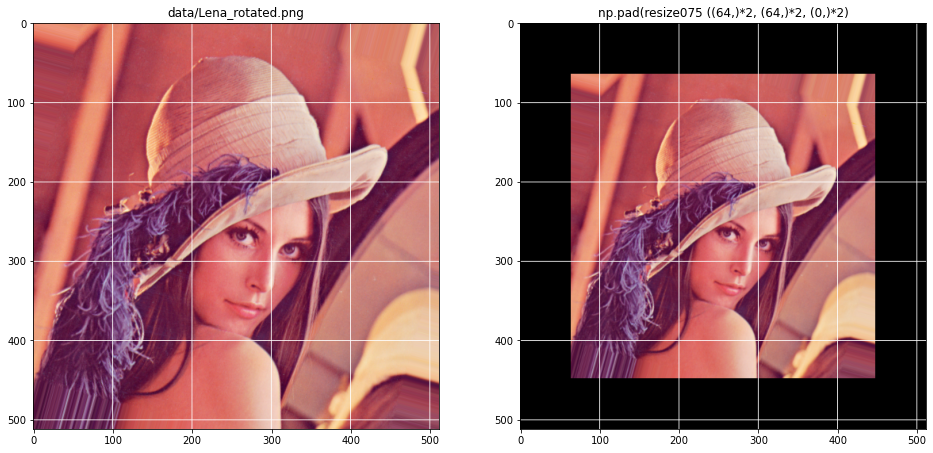

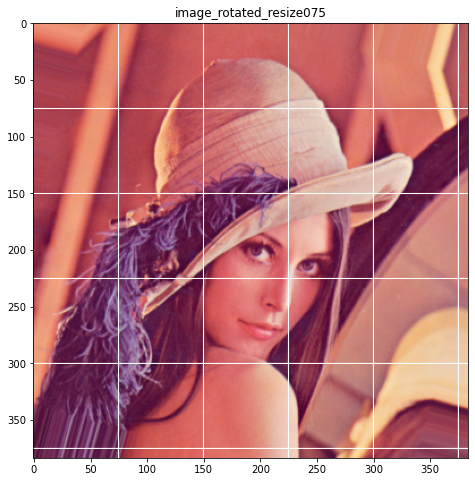

In [5]:
image_pad = np.pad(image_rotated_resize075, ((64,)*2, (64,)*2, (0,)*2), 'constant', constant_values=0)



###############################################################
print_image('image_rotated','image_rotated',image_rotated,x0,x1,y0,y1)
print_image('cv2.resize(image_rotated, 0.75)','image_rotated_resize075',
            image_rotated_resize075,dx0,dx1+2,dy0,dy1+2)
print_image('np.pad(image_rotated_resize075...)','image_pad',image_pad,dx0,dx1+2,dy0,dy1+2)
print_image('np.pad(image_rotated_resize075...)','image_pad',image_pad,0,2,0,10)

plt_view_image(plt,[["data/Lena_rotated.png",
                     draw_grid(np.copy(image_rotated),100,(255,255,255))[:,:,[2,1,0]]],
                    ["np.pad(resize075 ((64,)*2, (64,)*2, (0,)*2)",
                     draw_grid(np.copy(image_pad),100,(255,255,255))[:,:,[2,1,0]]]],
               figsize=(16,8), axis='on', cmap='gray')
plt_view_image(plt,[["image_rotated_resize075",draw_grid(np.copy(image_rotated_resize075),
                            None,(255,255,255), int(100*fX),int(100*fY))[:,:,[2,1,0]]]],
               figsize=(16,8), axis='on', cmap='gray') 


In [6]:
imgs_list = [image_orig, image_pad]

#### Create a SIFT keypoints detector:

# [<span style="color:red">SIFT and SURF implementations are no longer included in the OpenCV 3 library by default.</span>](https://www.pyimagesearch.com/2015/07/16/where-did-sift-and-surf-go-in-opencv-3/)

There are many, many alternatives to SIFT and SURF. 
* **ORB** is one. 
* **BRIEF**, 
* **BRISK**, 
* **FREAK**, 
* **KAZE**, and 
* **AKAZE** are others.

Choosing between them is very much application specific and I recommend trying the options, examining the accuracy, and then making the educated choice from there. I hope that helps!


[(OpenCV-Python) Build OpenCV 4.0.1-dev + contrib + non-free (SIFT,SURF) from sources on Windows 10 64-bit OS](https://drthitirat.wordpress.com/2019/01/20/opencv-python-build-opencv-4-0-1-dev-contrib-non-free-siftsurf-from-sources-on-windows-10-64-bit-os/)

In [7]:
sift = cv2.xfeatures2d.SIFT_create()
detector = cv2.xfeatures2d.SIFT_create(50)

error: OpenCV(4.2.0) C:\projects\opencv-python\opencv_contrib\modules\xfeatures2d\src\sift.cpp:1210: error: (-213:The function/feature is not implemented) This algorithm is patented and is excluded in this configuration; Set OPENCV_ENABLE_NONFREE CMake option and rebuild the library in function 'cv::xfeatures2d::SIFT::create'


In [ ]:
for i in range(len(imgs_list)):
    keypoints, descriptors = detector.detectAndCompute(imgs_list[i], None)
        
    imgs_list[i] = cv2.drawKeypoints(imgs_list[i], keypoints, None, (0, 255, 0),
                                     flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
    
cv2.imshow('SIFT keypoints', np.hstack(imgs_list))
cv2.waitKey()
        
cv2.destroyAllWindows()